In [48]:
import types
import pandas as pd
data = pd.read_csv('books.csv', delimiter=",", names =['bookID','title','authors','average_rating','isbn','isbn13','language_code','num_pages','ratings_count','text_reviews_count','publication_date','publish'] ,header= None, error_bad_lines=False)
data.drop(data.index[:1], inplace=True)
data.drop(data[data['bookID'] == '133'].index, inplace = True)
data.drop(data[data['bookID'] == '16914'].index, inplace = True)
data.drop(data[data['bookID'] == '34889'].index, inplace = True)
data.drop(data[data['bookID'] == '57'].index, inplace = True)
data.drop(data[data['average_rating'] == ' Jr./Sam B. Warner'].index, inplace = True)
data.drop(data[data['average_rating'] == ' Rawles'].index, inplace = True)
data.dropna(inplace = True)
data.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publish
1,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
2,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [49]:
df_books = data[['title','average_rating','ratings_count','text_reviews_count']]

In [51]:
df_books.head()

,title,average_rating,ratings_count,text_reviews_count
1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,27591
2,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,29221
3,Harry Potter and the Chamber of Secrets (Harry...,4.42,6333,244
4,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585,36325
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,164


In [52]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

In [53]:
from sklearn.preprocessing import StandardScaler
X = df_books[['average_rating', 'ratings_count', 'text_reviews_count']]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)

In [54]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 10)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 0 ... 0 0 0]


In [55]:
df_books["group"] = labels
df_books.head(30)

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,average_rating,ratings_count,text_reviews_count,group
1,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,27591,1
2,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,29221,1
3,Harry Potter and the Chamber of Secrets (Harry...,4.42,6333,244,0
4,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585,36325,1
5,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,164,0
6,"Unauthorized Harry Potter Book Seven News: ""Ha...",3.74,19,1,0
7,Harry Potter Collection (Harry Potter #1-6),4.73,28242,808,0
8,The Ultimate Hitchhiker's Guide: Five Complete...,4.38,3628,254,0
9,The Ultimate Hitchhiker's Guide to the Galaxy ...,4.38,249558,4080,2
10,The Hitchhiker's Guide to the Galaxy (Hitchhik...,4.22,4930,460,0


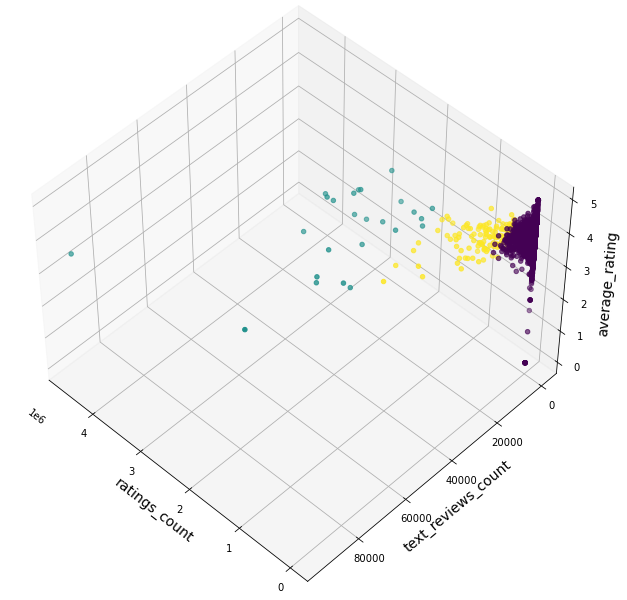

In [56]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(13,8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
ax.set_xlabel('ratings_count', fontsize = 14)
ax.set_ylabel('text_reviews_count', fontsize = 14)
ax.set_zlabel('average_rating', fontsize = 14)
ax.scatter(X[:, 1].astype(np.float), X[:, 2].astype(np.float), X[:, 0].astype(np.float), c= labels.astype(np.float))